In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
first_row = session.query(Measure).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1fcebfb50b8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
max_date = session.query(Measure).order_by(desc(Measure.date)).first()
print(f"Most Recent Date: {max_date.date}")

Most Recent Date: 2017-08-23


In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_start=dt.date(2017, 8 ,23)-dt.timedelta(days=365)
print(f"One year prior: {year_start}")

One year prior: 2016-08-23


In [15]:
min_date = session.query(Measure).order_by(Measure.date.asc()).first()
print(f"The Oldest Date: {min_date.date}")

The Oldest Date: 2010-01-01


In [16]:
# Perform a query to retrieve the data and precipitation scores
session.query(Measure.date, Measure.prcp).filter(Measure.date>=year_start).all()

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_precips=session.query(Measure.date, Measure.prcp).\
                             filter(Measure.date>=year_start).all()
year_precips_df=pd.DataFrame(year_precips).set_index('date').dropna()
year_precips_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


In [18]:
# Sort the dataframe by date
type(year_precips_df)


pandas.core.frame.DataFrame

In [19]:
sorted_df=year_precips_df.sort_index()
sorted_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


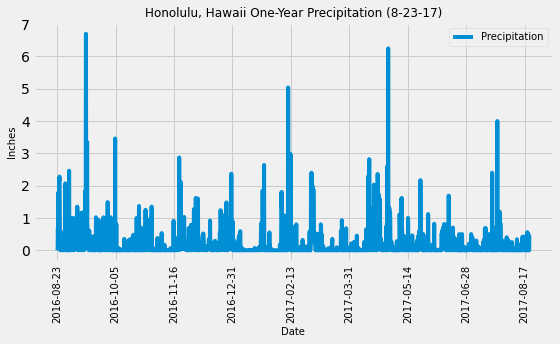

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(figsize=(8,5))
plt.title("Honolulu, Hawaii One-Year Precipitation (8-23-17)",fontsize=12)
plt.ylabel("Inches",fontsize=10)
plt.xlabel("Date",fontsize=10)
plt.xticks(fontsize=10, rotation=90)
plt.legend(["Precipitation"],fontsize=10,loc=1)
plt.tight_layout()
plt.savefig("Images/one_year_precipitation.png")
plt.show()

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.agg(['count','mean','min','median','max','std'])

,prcp
count,2021.000000
mean,0.177279
min,0.000000
median,0.020000
max,6.700000
std,0.461190


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Measure).distinct(Measure.station).group_by(Measure.station).count()
print(f"There are {total_stations} stations total.")

There are 9 stations total.


In [23]:
session.query(Station.station, Station.name).all()

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).all()

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [25]:
station_list=session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).all()
station_list.sort(key=lambda x: x[1], reverse=True)
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# session.query(Measure.station, Measure.tobs).filter(Measure.station=='USC00519281').all()
min_temp=session.query(func.min(Measure.tobs)).filter(Measure.station=='USC00519281').all()
max_temp=session.query(func.max(Measure.tobs)).filter(Measure.station=='USC00519281').all()
avg_temp=session.query(func.avg(Measure.tobs)).filter(Measure.station=='USC00519281').all()
print(f"The lowest temp observed at station USC00519281 was {min_temp[0][0]}")
print(f"The highest temp observed at station USC00519281 was {max_temp[0][0]}")
print(f"The average temp observed at station USC00519281 was {avg_temp[0][0]}")

The lowest temp observed at station USC00519281 was 54.0
The highest temp observed at station USC00519281 was 85.0
The average temp observed at station USC00519281 was 71.66378066378067


In [30]:
session.query(Measure.date, Measure.tobs).filter(Measure.station=='USC00519281').filter(Measure.date>=year_start).all()

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_df=pd.DataFrame(session.query(Measure.tobs).filter(Measure.station=='USC00519281').filter(Measure.date>=year_start).all())
station_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


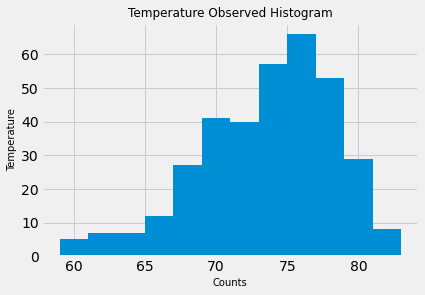

In [32]:
plt.hist(station_df['tobs'],bins=12)
plt.title('Temperature Observed Histogram', fontsize=12)
plt.xlabel('Counts', fontsize=10)
plt.ylabel('Temperature', fontsize=10)
plt.savefig("Images/tobs_histogram.png")
plt.show()

# Close session

In [33]:
# Close Session
session.close()